# Map topog fields for p125 model 

In [1]:
# Stephen.Griffies@noaa.gov 

In [2]:
import matplotlib.pyplot as plt
#import matplotlib.ticker as mticker
import numpy as np
import seaborn as sns
import netCDF4
import cmocean
import cartopy.crs as ccrs
import mplsettings


#import cartopy.crs as ccrs
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [3]:
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
dirstix = "../../common/static_ttf"

import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [4]:
# 1/8th degree MOM6 topography

fname_static = "../../common/CM4X_p125/ocean_annual.static.nc"

#fname_model = "/archive/Raphael.Dussin/datasets/OM4p125/mosaic_c192_om4p125_bedmachine_v20210310_hydrographyKDunne20210614_unpacked/ocean_topog.nc"
fname_model = "../../common/CM4X_p125/ocean_topog.nc"
topog_model = netCDF4.Dataset(fname_model)

#fname_grid_model = "/archive/Raphael.Dussin/datasets/OM4p125/mosaic_c192_om4p125_bedmachine_v20210310_hydrographyKDunne20210614_unpacked/ocean_hgrid.nc"
fname_grid_model = "../../common/CM4X_p125/ocean_hgrid.nc"
grid_model       = netCDF4.Dataset(fname_grid_model)

# vorticity (q) points (best for pcolormesh to have edges of fields)
xmodel_q = grid_model.variables['x'][:][::2,::2]
ymodel_q = grid_model.variables['y'][:][::2,::2]

# thickness points
xmodel_h = grid_model.variables['x'][:][1::2,1::2]
ymodel_h = grid_model.variables['y'][:][1::2,1::2]

# define height = -depth corresponding to gebco
depth_model    = topog_model.variables['depth'][:]
#depth_model    = np.ma.masked_less(depth_model, 0.0, copy=True)
depth_masked   = np.where(depth_model >0., depth_model, np.nan)

wet_model      = np.zeros(depth_model.shape)
wet_model      = np.where(depth_model>0.,1.0,0.0)

h2_model    = topog_model.variables['h2']
h2_model    = np.ma.masked_less(h2_model, 0.0, copy=True)
h2_model    = h2_model * wet_model 
h2_masked   = np.where(h2_model >0., h2_model, np.nan)

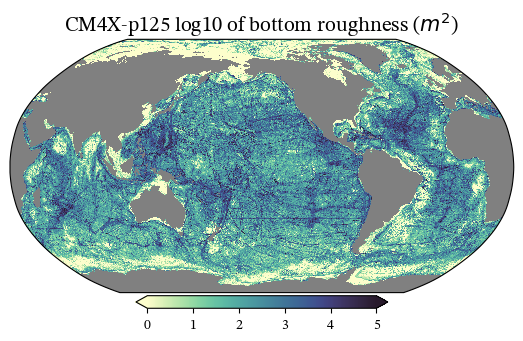

In [5]:
#MOM topog variance 

vmin=0.0   ; vmax=5.0
field = np.log10(h2_masked)
x = xmodel_q
y = ymodel_q

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p = plt.pcolormesh(x,y,field,
           transform=ccrs.PlateCarree(),
           vmin=vmin, vmax=vmax,
           cmap=cmocean.cm.deep,
           linewidths=0.25
           )

plt.gca().set_facecolor('gray')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', extend='both', shrink=0.5,orientation='horizontal')
plt.title('CM4X-p125 log10 of bottom roughness ($m^2$)', fontsize=15)   
plt.show()
fig.savefig('FigA5_CM4Xp125_h2_topog.jpg', bbox_inches='tight', dpi=400, format='jpeg')

